In [1]:
# Author: Kemal Eren <kemal@kemaleren.com>
# License: BSD 3 clause

import numpy as np
from matplotlib import pyplot as plt

from sklearn.datasets import make_biclusters
from sklearn.cluster import SpectralCoclustering, SpectralBiclustering
from sklearn.metrics import consensus_score


# A demo of the Spectral Co-Clustering algorithm


This example demonstrates how to generate a dataset and bicluster it
using the Spectral Co-Clustering algorithm.

The dataset is generated using the ``make_biclusters`` function, which
creates a matrix of small values and implants bicluster with large
values. The rows and columns are then shuffled and passed to the
Spectral Co-Clustering algorithm. Rearranging the shuffled matrix to
make biclusters contiguous shows how accurately the algorithm found
the biclusters.




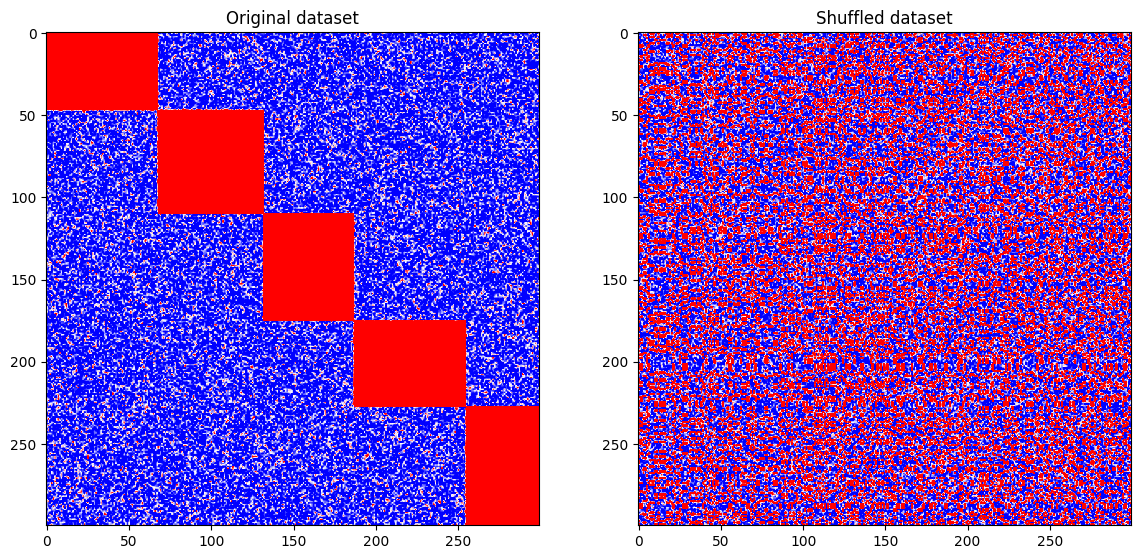

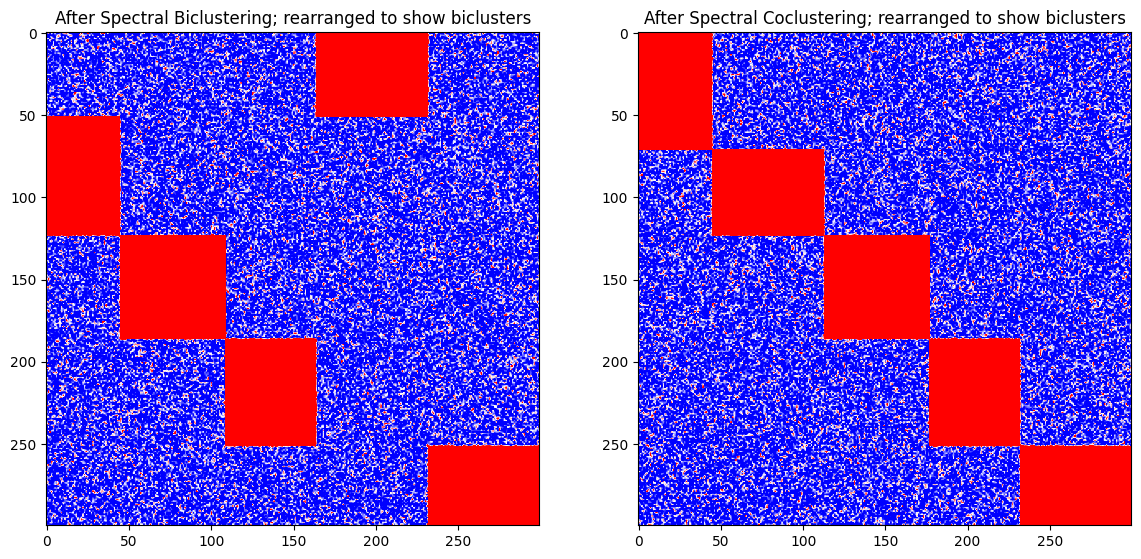

consensus score of Spectral Biclustering: 0.200
consensus score of Spectral Coclustering: 1.000


In [2]:
data, rows, columns = make_biclusters(
    shape=(300, 300), n_clusters=5, noise=5,
    shuffle=False, random_state=0)

cmap = plt.cm.bwr

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(data, cmap=cmap, vmin=0, vmax=10, aspect=1)
plt.title("Original dataset")

# shuffle clusters
plt.subplot(1,2,2)
rng = np.random.RandomState(0)
row_idx = rng.permutation(data.shape[0])
col_idx = rng.permutation(data.shape[1])
data = data[row_idx][:, col_idx]
plt.imshow(data, cmap=cmap, vmin=0, vmax=10, aspect=1)
plt.title("Shuffled dataset")
plt.show()

model1 = SpectralBiclustering(n_clusters=5, random_state=0)
model1.fit(data)
score1 = consensus_score(model1.biclusters_,
                         (rows[:, row_idx], columns[:, col_idx]))
fit_data1 = data[np.argsort(model1.row_labels_)]
fit_data1 = fit_data1[:, np.argsort(model1.column_labels_)]

plt.figure(figsize=(14,7))
plt.subplot(1,2,1)
plt.imshow(fit_data1, cmap=cmap, vmin=0, vmax=10, aspect=1)
plt.title("After Spectral Biclustering; rearranged to show biclusters")

plt.subplot(1,2,2)
model2 = SpectralCoclustering(n_clusters=5, random_state=0)
model2.fit(data)
score2 = consensus_score(model2.biclusters_,
                         (rows[:, row_idx], columns[:, col_idx]))
fit_data2 = data[np.argsort(model2.row_labels_)]
fit_data2 = fit_data2[:, np.argsort(model2.column_labels_)]
plt.imshow(fit_data2, cmap=cmap, vmin=0, vmax=10, aspect=1)
plt.title("After Spectral Coclustering; rearranged to show biclusters")
plt.show()
print("consensus score of Spectral Biclustering: {:.3f}".format(score1))
print("consensus score of Spectral Coclustering: {:.3f}".format(score2))